In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
import seaborn as sns
from sklearn.metrics import accuracy_score,mean_squared_error,classification_report,confusion_matrix,precision_score,recall_score,roc_curve,auc
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data=pd.read_csv('health care diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Project Task: Week 1

## 1-Treating missing values 

### In this datasets 0 is null values so we replacing 0 by mean of their feature columns.

In [3]:
print(data['Glucose'].mean())
print(data['BloodPressure'].mean())
print(data['SkinThickness'].mean())
print(data['Insulin'].mean())

120.89453125
69.10546875
20.536458333333332
79.79947916666667


In [4]:
print('Glucose-',len(data['Glucose'][data['Glucose']==0]))
print('BloodPressure-',len(data['BloodPressure'][data['BloodPressure']==0]))
print('SkinThickness-',len(data['SkinThickness'][data['SkinThickness']==0]))
print('Insulin-',len(data['Insulin'][data['Insulin']==0]))

Glucose- 5
BloodPressure- 35
SkinThickness- 227
Insulin- 374


In [5]:
data['Glucose']=data['Glucose'].replace([0],[data['Glucose'].mean()])
data['BloodPressure']=data['BloodPressure'].replace([0],[data['BloodPressure'].mean()])
data['SkinThickness']=data['SkinThickness'].replace([0],[data['SkinThickness'].mean()])
data['Insulin']=data['Insulin'].replace([0],[data['Insulin'].mean()])

In [6]:
print('Glucose-',len(data['Glucose'][data['Glucose']==120.89453125]))
print('BloodPressure-',len(data['BloodPressure'][data['BloodPressure']==69.10546875]))
print('SkinThickness-',len(data['SkinThickness'][data['SkinThickness']==20.536458333333332]))
print('Insulin-',len(data['Insulin'][data['Insulin']==79.79947916666667]))

Glucose- 5
BloodPressure- 35
SkinThickness- 227
Insulin- 374


## Detecting Outliers

In [7]:
columns=data[['Glucose','BloodPressure','SkinThickness','Insulin']]

<AxesSubplot:>

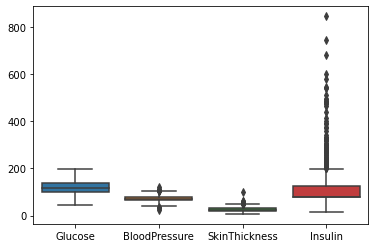

In [8]:
sns.boxplot(data=columns)

In [9]:
sorted(data)

Q1=data.quantile(0.20)
Q3=data.quantile(0.80)
IQR=Q3-Q1
print(IQR)

Pregnancies                  6.000000
Glucose                     52.000000
BloodPressure               20.000000
SkinThickness               14.463542
Insulin                     70.200521
BMI                         11.900000
DiabetesPedigreeFunction     0.467600
Age                         19.600000
Outcome                      1.000000
dtype: float64


In [10]:
data_cleared_iqr = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_cleared_iqr
print(data_cleared_iqr.shape)
print(data.shape)


(678, 9)
(768, 9)


In [11]:
data_cleared_iqr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [12]:
col=data_cleared_iqr[['Glucose','BloodPressure','SkinThickness','Insulin']]

<AxesSubplot:>

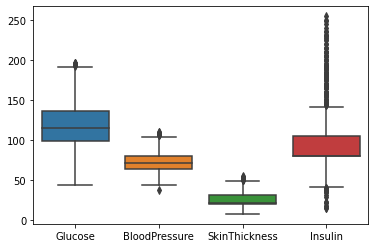

In [13]:
sns.boxplot(data=col)

## 2-Visually exploring variables using histograms 

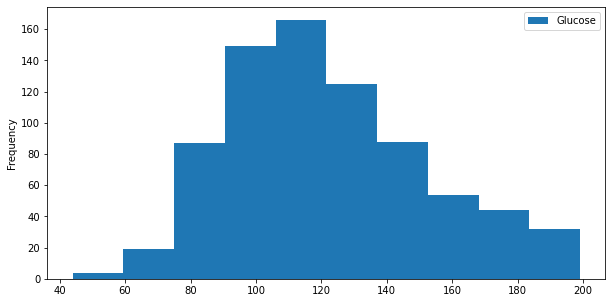

In [14]:
data['Glucose'].plot(kind='hist',figsize=(10,5))
plt.legend()

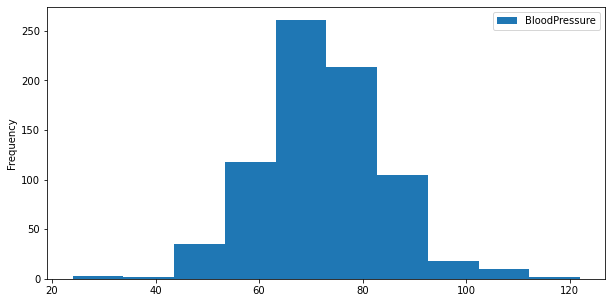

In [15]:
data['BloodPressure'].plot(kind='hist',figsize=(10,5))
plt.legend()

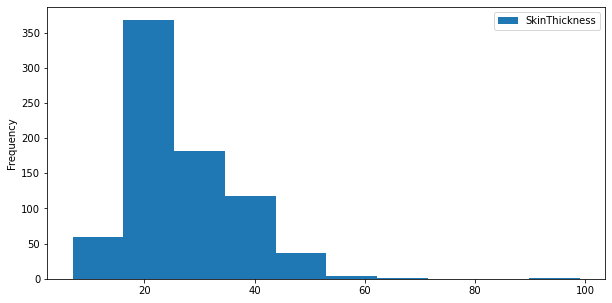

In [16]:
data['SkinThickness'].plot(kind='hist',figsize=(10,5),)
plt.legend()

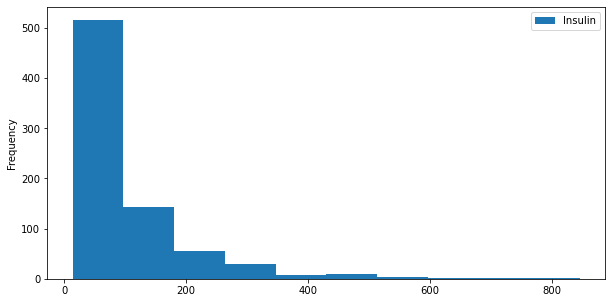

In [17]:
data['Insulin'].plot(kind='hist',figsize=(10,5))
plt.legend()

##  3-Create a count (frequency) plot describing the data types and the count of variables. 

In [18]:
data.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [19]:
data.dtypes.value_counts()

float64    6
int64      3
dtype: int64

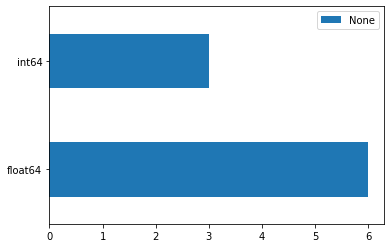

In [20]:
figsize=(16,2)
data.dtypes.value_counts().plot(kind='barh')
plt.legend()

# Project Task: Week 2
## Data Exploration:

## 1-Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

In [21]:
data['Outcome'].value_counts()


0    500
1    268
Name: Outcome, dtype: int64

Text(0.5, 1.0, 'Outcome')

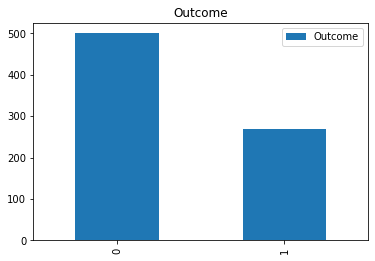

In [22]:
data['Outcome'].value_counts().plot(kind='bar')
plt.legend()
plt.title('Outcome')

In [23]:
outcome=(data['Outcome'].value_counts()/data['Outcome'].shape)*100
outcome

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [24]:
balanced_data=100-outcome
balanced_data

0    34.895833
1    65.104167
Name: Outcome, dtype: float64

Text(0.5, 1.0, 'Balanced_data')

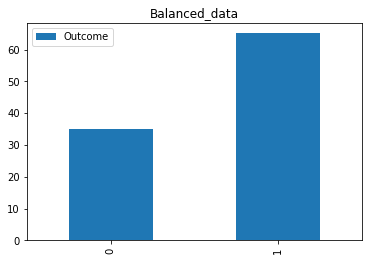

In [25]:
balanced_data.plot(kind='bar')
plt.legend()
plt.title('Balanced_data')

###  Findings and plan future course of action.

##  2-Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

<AxesSubplot:xlabel='Glucose', ylabel='BloodPressure'>

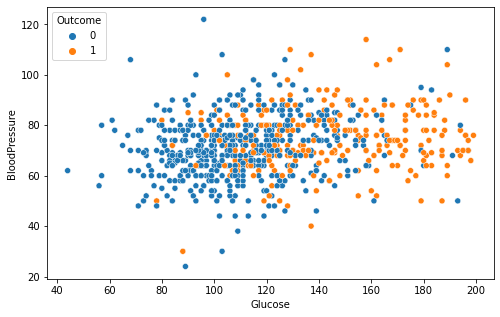

In [26]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Glucose',y='BloodPressure',hue='Outcome',data=data)

<AxesSubplot:xlabel='BMI', ylabel='Insulin'>

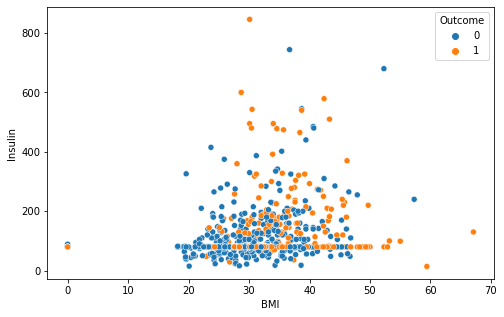

In [27]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='BMI',y='Insulin',hue='Outcome',data=data)

<AxesSubplot:xlabel='SkinThickness', ylabel='Insulin'>

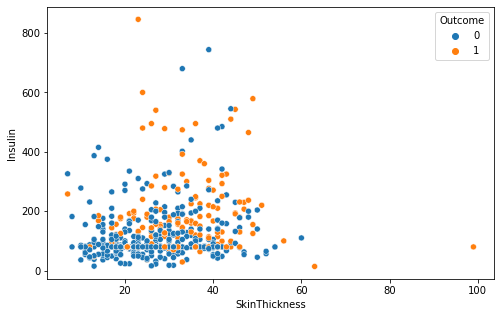

In [28]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='SkinThickness',y='Insulin',hue='Outcome',data=data)

<AxesSubplot:xlabel='Age', ylabel='Glucose'>

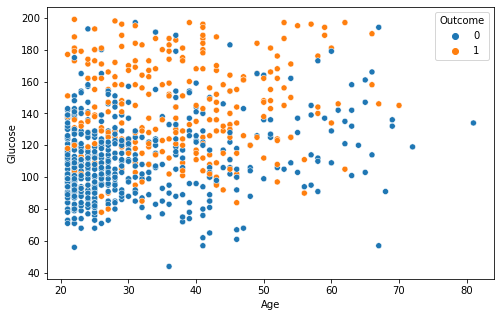

In [29]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age',y='Glucose',hue='Outcome',data=data)

<AxesSubplot:xlabel='Age', ylabel='Pregnancies'>

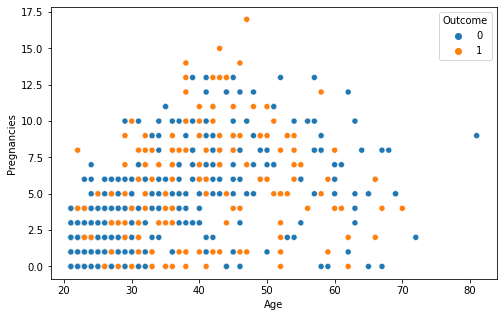

In [30]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age',y='Pregnancies',hue='Outcome',data=data)

## 3- Perform correlation analysis. Visually explore it using a heat map.

<AxesSubplot:>

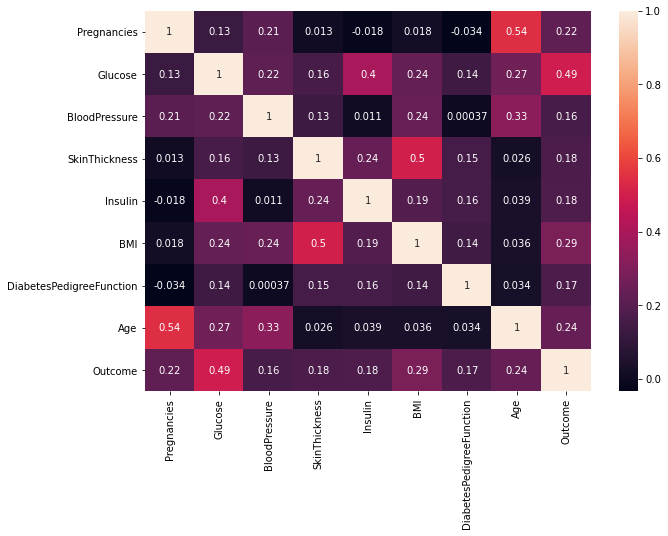

In [32]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)


## Project Task: Week 3

## Data Modeling:

###  1- Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. 

### Feature Selection

In [33]:
x=data.drop(['Outcome'],axis=1)
y=data.Outcome

In [34]:
data.corrwith(data['Outcome'])

Pregnancies                 0.221898
Glucose                     0.492908
BloodPressure               0.162986
SkinThickness               0.175026
Insulin                     0.179185
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
dtype: float64

In [35]:
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(8,'Score'))  #print 10 best features

                      Specs        Score
4                   Insulin  1798.088682
1                   Glucose  1418.660636
7                       Age   181.303689
5                       BMI   127.669343
0               Pregnancies   111.519691
3             SkinThickness    81.917622
2             BloodPressure    41.394665
6  DiabetesPedigreeFunction     5.392682


<AxesSubplot:>

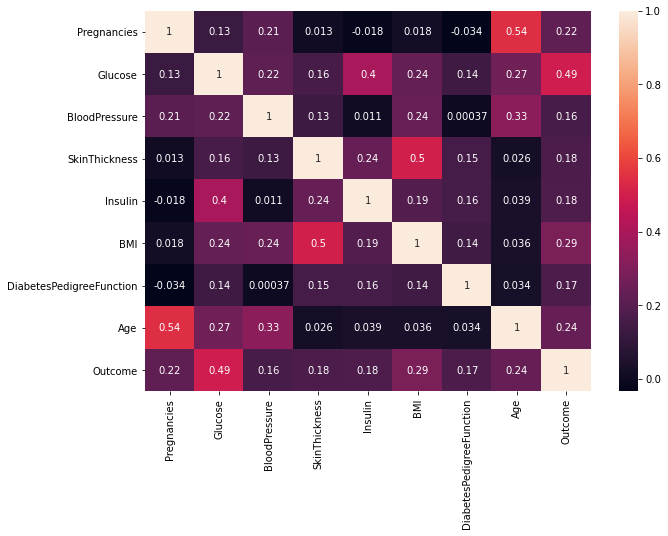

In [36]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)

In [37]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [38]:
new_x=data.drop(['Outcome','BloodPressure'],axis=1).values
new_y=data.Outcome.values

## SMOTE

### Train a model 

In [39]:
trainx,testx,trainy,testy=train_test_split(new_x,new_y,test_size=0.20,random_state=10)

In [40]:
print("Before OverSampling, counts of label '1': {}".format(sum(trainy == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(trainy == 0)))
  
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state =63)
trainx_res,trainy_res = sm.fit_resample(trainx,trainy.ravel())  
print('After OverSampling, the shape of train_X: {}'.format(trainx_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(trainy_res.shape))
  

print("After OverSampling, counts of label '1': {}".format(sum(trainy_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(trainy_res == 0)))

Before OverSampling, counts of label '1': 209
Before OverSampling, counts of label '0': 405 

After OverSampling, the shape of train_X: (810, 7)
After OverSampling, the shape of train_y: (810,) 

After OverSampling, counts of label '1': 405
After OverSampling, counts of label '0': 405


In [ ]:
#sc=StandardScaler()

In [ ]:
#trainx=sc.fit_transform(trainx)
#testx=sc.fit_transform(testx)

## 2- Apply an appropriate classification algorithm to build a model.

In [60]:
logreg=LogisticRegression(solver='liblinear',random_state=123)

In [61]:
logreg.fit(trainx_res,trainy_res)

LogisticRegression(random_state=123, solver='liblinear')

In [62]:
prediction=logreg.predict(testx)

In [63]:
print('Accuracy_score -',accuracy_score(testy,prediction))
print('Mean_squared_error -',mean_squared_error(testy,prediction))

Accuracy_score - 0.7337662337662337
Mean_squared_error - 0.2662337662337662


In [64]:
print((confusion_matrix(testy,prediction)))


[[70 25]
 [16 43]]


In [65]:
print(classification_report(testy,prediction))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77        95
           1       0.63      0.73      0.68        59

    accuracy                           0.73       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.74      0.73      0.74       154



AUC: 0.839


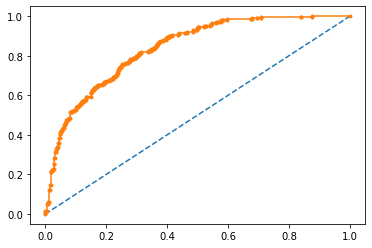

In [66]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = logreg.predict_proba(trainx_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(trainy_res, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')



## RandomForestClassifier

In [67]:
rf=RandomForestClassifier(random_state=42,max_depth=5)

In [68]:
rf.fit(trainx_res,trainy_res)

RandomForestClassifier(max_depth=5, random_state=42)

In [69]:
rf_predict=rf.predict(testx)

In [70]:
print('Accuracy_score -',accuracy_score(testy,rf_predict))
print('Mean_squared_error -',mean_squared_error(testy,rf_predict))

Accuracy_score - 0.7402597402597403
Mean_squared_error - 0.2597402597402597


### RandomForestClassifier( Hyper Parameter Tunning )

In [71]:
param_grid={'n_estimators':[100,400,200,300],'criterion':['gini','entropy'],'max_depth':[1,2,3],'min_samples_split':[2,4,3],'min_samples_leaf':[1,2,3],
'max_leaf_nodes':[1,2,3],'max_samples':[2,4,3]}

In [72]:
grid=GridSearchCV( estimator=rf,param_grid=param_grid,n_jobs=-1,cv=5,verbose=2)

In [73]:
#grid.fit(trainx_res,trainy_res)

In [125]:
#grid.best_params_

In [75]:
rf_grid=RandomForestClassifier(criterion= 'gini',max_depth= 2,max_leaf_nodes=3,max_samples=4,min_samples_leaf= 1,min_samples_split=3,
 n_estimators= 400,random_state=42)

In [76]:
rf_grid.fit(trainx_res,trainy_res)

RandomForestClassifier(max_depth=2, max_leaf_nodes=3, max_samples=4,
                       min_samples_split=3, n_estimators=400, random_state=42)

In [77]:
rf_grid_predict=rf_grid.predict(testx)

In [78]:
print('Accuracy_score -',accuracy_score(testy,rf_grid_predict))
print('Mean_squared_error -',mean_squared_error(testy,rf_grid_predict))

Accuracy_score - 0.7337662337662337
Mean_squared_error - 0.2662337662337662


In [79]:
print((confusion_matrix(testy,prediction)))

[[70 25]
 [16 43]]


In [80]:
print(classification_report(testy,prediction))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77        95
           1       0.63      0.73      0.68        59

    accuracy                           0.73       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.74      0.73      0.74       154



AUC: 0.938


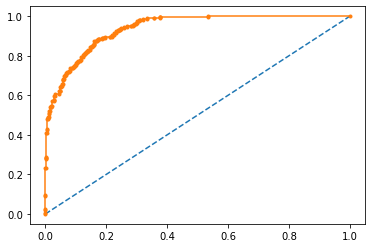

In [81]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = rf.predict_proba(trainx_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(trainy_res, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')



## DecisionTreeClassifier

In [82]:
dc=DecisionTreeClassifier(random_state=42)

In [83]:
dc.fit(trainx_res,trainy_res)

DecisionTreeClassifier(random_state=42)

In [84]:
dc_pred=dc.predict(testx)

In [85]:
print('Accuracy_score -',accuracy_score(testy,dc_pred))
print('Mean_squared_error -',mean_squared_error(testy,dc_pred))

Accuracy_score - 0.6623376623376623
Mean_squared_error - 0.33766233766233766


### DecisionTreeClassifier( Hyper Parameter Tunning )

In [86]:
dc_param_grid={'splitter':["best", "random"],'criterion':['gini','entropy'],'max_depth':[1,2,3],
'min_samples_split':[1,2,3],'min_samples_leaf':[1,2,3],'max_leaf_nodes':[1,2,3]}

In [87]:
dc_grid=GridSearchCV(estimator=dc,param_grid=dc_param_grid,n_jobs=-1,cv=5,verbose=2)
dc_grid.fit(trainx_res,trainy_res)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


D:\New folder\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.71851852 0.70864198 0.71851852 0.70864198
        nan        nan 0.71851852 0.70864198 0.71851852 0.70864198
        nan        nan 0.71851852 0.70864198 0.71851852 0.70864198
        nan        nan 0.71851852 0.70864198 0.71851852 0.70864198
        nan        nan 0.71851852 0.70864198 0.71851852 0.70864198
        nan        nan 0.71851852 0.70864198 0.71851852 0.70864198
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.71851852 0.70864198 0.71851852 0.708641

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3], 'max_leaf_nodes': [1, 2, 3],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'splitter': ['best', 'random']},
             verbose=2)

In [88]:
dc_grid.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'max_leaf_nodes': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [89]:
dc_final=DecisionTreeClassifier(criterion= 'gini', max_depth=2,max_leaf_nodes=4,min_samples_leaf= 1,
min_samples_split= 2,splitter='best',random_state=42)

In [90]:
dc_final.fit(trainx_res,trainy_res)
dc_final_pred=dc_final.predict(testx)

In [91]:
print('Accuracy_score -',accuracy_score(testy,dc_final_pred))
print('Mean_squared_error -',mean_squared_error(testy,dc_final_pred))

Accuracy_score - 0.6883116883116883
Mean_squared_error - 0.3116883116883117


In [92]:
print((confusion_matrix(testy,dc_final_pred)))

[[73 22]
 [26 33]]


In [93]:
print((classification_report(testy,dc_final_pred)))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75        95
           1       0.60      0.56      0.58        59

    accuracy                           0.69       154
   macro avg       0.67      0.66      0.67       154
weighted avg       0.68      0.69      0.69       154



AUC: 0.795


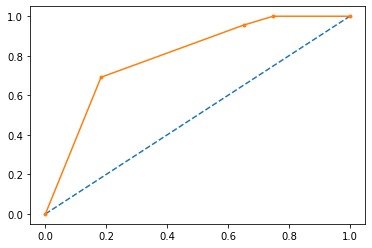

In [94]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = dc_final.predict_proba(trainx_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(trainy_res, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')



## Support Vector Machines

In [95]:
svc=SVC(random_state=42,probability=True)

In [96]:
svc.fit(trainx_res,trainy_res)

SVC(probability=True, random_state=42)

In [97]:
svc_pred=svc.predict(testx)

In [98]:
print('Accuracy_score -',accuracy_score(testy,svc_pred))
print('Mean_squared_error -',mean_squared_error(testy,svc_pred))

Accuracy_score - 0.7142857142857143
Mean_squared_error - 0.2857142857142857


In [99]:
print((confusion_matrix(testy,svc_pred)))

[[71 24]
 [20 39]]


In [100]:
print((classification_report(testy,svc_pred)))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76        95
           1       0.62      0.66      0.64        59

    accuracy                           0.71       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.71      0.72       154



AUC: 0.836


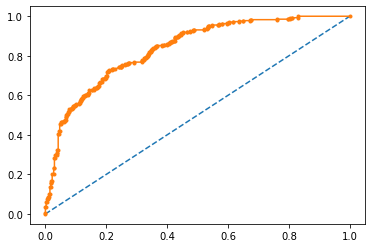

In [101]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = svc.predict_proba(trainx_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(trainy_res, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')



## Naive Bayes

In [102]:
model=GaussianNB()

In [103]:
model.fit(trainx_res,trainy_res)

GaussianNB()

In [104]:
model_pred=model.predict(testx)

In [105]:
print('Accuracy_score -',accuracy_score(testy,model_pred))
print('Mean_squared_error -',mean_squared_error(testy,model_pred))

Accuracy_score - 0.7207792207792207
Mean_squared_error - 0.2792207792207792


In [106]:
print((confusion_matrix(testy,model_pred)))

[[76 19]
 [24 35]]


In [107]:
print((classification_report(testy,model_pred)))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78        95
           1       0.65      0.59      0.62        59

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



AUC: 0.816


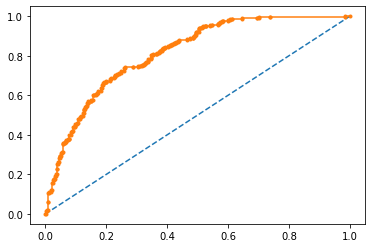

In [108]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = model.predict_proba(trainx_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(trainy_res, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')



## xgboost

In [109]:
from xgboost import XGBClassifier

In [110]:
xgb=XGBClassifier()

In [111]:
xgb.fit(trainx_res,trainy_res)
xgb_pred=xgb.predict(testx)

[13:46:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\New folder\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [112]:
print('Accuracy_score -',accuracy_score(testy,xgb_pred))
print('Mean_squared_error -',mean_squared_error(testy,xgb_pred))

Accuracy_score - 0.7207792207792207
Mean_squared_error - 0.2792207792207792


In [113]:
print((confusion_matrix(testy,xgb_pred)))

[[74 21]
 [22 37]]


In [114]:
print((classification_report(testy,xgb_pred)))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77        95
           1       0.64      0.63      0.63        59

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



AUC: 1.000


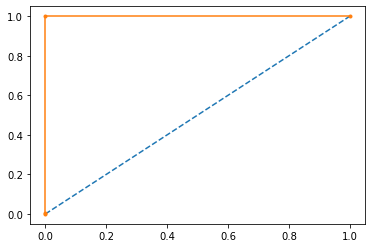

In [115]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = xgb.predict_proba(trainx_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(trainy_res, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')



## KNN

In [116]:
from sklearn.neighbors import KNeighborsClassifier  

In [117]:
knn=KNeighborsClassifier(n_neighbors=4)

In [118]:
knn.fit(trainx_res,trainy_res)

KNeighborsClassifier(n_neighbors=4)

In [119]:
knn_pred=knn.predict(testx)

In [120]:
print('Accuracy_score -',accuracy_score(testy,knn_pred))
print('Mean_squared_error -',mean_squared_error(testy,knn_pred))

Accuracy_score - 0.6233766233766234
Mean_squared_error - 0.37662337662337664


In [121]:
print((confusion_matrix(testy,knn_pred)))

[[68 27]
 [31 28]]


In [122]:
print((classification_report(testy,knn_pred)))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70        95
           1       0.51      0.47      0.49        59

    accuracy                           0.62       154
   macro avg       0.60      0.60      0.60       154
weighted avg       0.62      0.62      0.62       154



AUC: 0.951


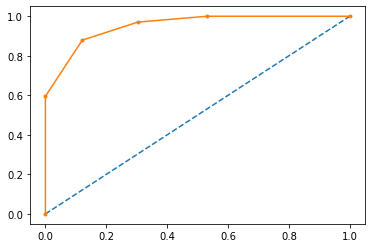

In [123]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = knn.predict_proba(trainx_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(trainy_res, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')



In [124]:
Alogrithms=['KNN','RandomForest','Decisiontree','SVM','Naive Bayes','xgboost']
Accuracy_Score=[accuracy_score(testy,knn_pred),accuracy_score(testy,rf_grid_predict),accuracy_score(testy,dc_final_pred),
               accuracy_score(testy,svc_pred),accuracy_score(testy,model_pred),accuracy_score(testy,xgb_pred)]

## Compare various models with the results from KNN algorithm.

In [59]:
#creating the objects
logreg_cv = LogisticRegression(solver='liblinear',random_state=123)
dt_cv=DecisionTreeClassifier(random_state=123)
knn_cv=KNeighborsClassifier()
svc_cv=SVC(kernel='linear',random_state=123)
nb_cv=GaussianNB()
rf_cv=RandomForestClassifier(random_state=123)
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes',5:'Random Forest'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv,rf_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, trainx, trainy, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.7768376520359598
Decision Tree Test Accuracy: 0.7053146483342146
KNN Test Accuracy: 0.7229772607086197
SVC Test Accuracy: 0.7720518244315177
Naive Bayes Test Accuracy: 0.7638286620835537
Random Forest Test Accuracy: 0.762083553675304
